In [193]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://bit.ly/2Z1BL82",width=930)

#                                    [Divvy bike sharing data-2018]

### _Chicago Illinois has bikes available to rent all over the city called Divvy Bikes. This Data Set is the contains all of the data from 2018 Q1 & Q2 DATA 2018 Q3 & Q4._ 
### _Columns in the data set_:
- trip_id              
- start_time         
- end_time            
- bikeid                 
- tripduration         
- from_station_id        
- from_station_name     
- to_station_id          
- to_station_name      
- usertype             
- gender              
- birthyear           
- Quarter 

### _Data Source:_
#### https://www.kaggle.com/michaelshoemaker/divvy-bike-chicago-2018



#### _Importing Libraries_

In [167]:
import seaborn as sns
from textwrap import wrap
import datetime
import matplotlib.pyplot as plt 
import matplotlib
from collections import Counter
from itertools import chain 
import time

#### _Reading Data_

In [170]:
# read file for Q1
import pandas as pd
df1=pd.read_csv("Divvy_Trips_2018_Q1.csv",thousands=',')
df1['Quarter']='Q1'
print("Q1 file shape",df1.shape)

Q1 file shape (387145, 13)


In [118]:
print (df1.dtypes)

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration         float64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
Quarter               object
dtype: object


In [171]:
import pandas as pd
df2=pd.read_csv("Divvy_Trips_2018_Q2.csv",thousands=',')
df2['Quarter']='Q2'
print("Q2 file shape",df2.shape)

Q2 file shape (1059681, 13)


In [172]:
import pandas as pd
df3=pd.read_csv("Divvy_Trips_2018_Q3.csv",thousands=',')
df3['Quarter']='Q3'
print("Q3 file shape",df3.shape)

Q3 file shape (1513570, 13)


In [173]:
import pandas as pd
df4=pd.read_csv("Divvy_Trips_2018_Q4.csv",thousands=',')
df4['Quarter']='Q4'
print("Q4 file shape",df4.shape)

Q4 file shape (642686, 13)


### _Merging the DataFrame of all four quarter into one_

In [175]:
newdf=pd.concat([df1,df2,df3,df4],ignore_index=True)#3603082
newdf = newdf.reindex(index=[i for i in range(newdf.shape[0])])
print("The shape of the merged data frame is {}".format (shape(newdf)))

The shape of the merged data frame is (3603082, 13)


### _Data Cleaning Task_

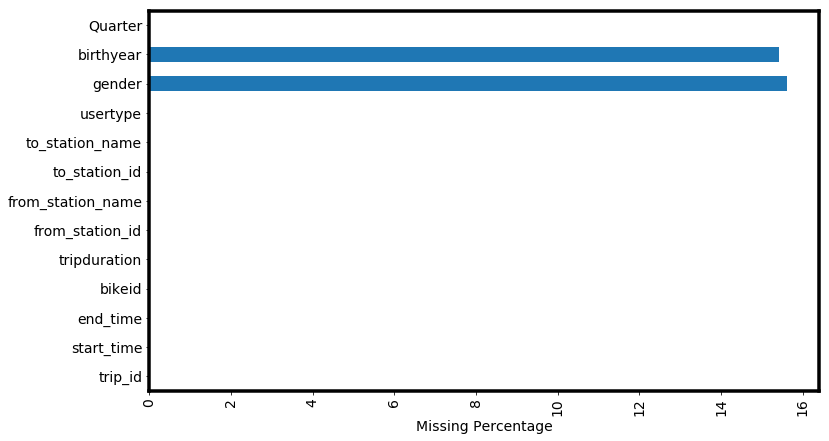

In [176]:
#how many missing values in the columns
missing=(newdf.isnull().sum()*100)/len(newdf)
plt.figure(figsize=(12,7))
missing.plot(kind='barh')
plt.xticks(rotation=90,fontsize=14)
#plt.xlim(min(missing)-1,max(missing)+3)
plt.yticks(fontsize=14)
plt.xlabel("Missing Percentage",fontsize=14)
matplotlib.rcParams['axes.linewidth'] = 3.5

__As we can refer the above bar plot: The Birth Year and Gende column has missing values. Around 15% values are missing in both the columns.As the missing percentage is not very huge, I decided to provide random values ['Male,Female'] in the gender column. For the birth year column I decided to remove the null records__

In [178]:
#how many rows are missing from both the columns
print("missing gender rows:",newdf['gender'].isnull().sum())
print("missing birth year rows:",newdf['birthyear'].isnull().sum())

missing gender rows: 562505
missing birth year rows: 555209


### _Handling missing values_

In [179]:
#Here we are imputing the missing values in gender column with [Male,Female] 
import numpy as np
newdf['gender'].fillna(np.random.choice(['Male','Female']), inplace=True)

In [180]:
#Removing records with null values in birth year column
null_index_list=newdf[newdf['birthyear'].isnull()].index.tolist()
newdf=newdf.drop(index=null_index_list)

## Exploratory Data Analysis:
#### Objective Questions:
- __Ratio of Male vs Female in the bike rent distribution__
- __Ratio of Male vs Female in the bike rent distribution__
- __Male and Female breakdown into user type (Customer or Subscriber)__
- __Week day wise bike rent distribution for FY 2018__
- __Quarter wise bike rent distribution for FY 2018__
- __Month wise bike rent distribution for FY 2018__
- __Age wise bike rent distribution for FY 2018__
- __What are the most frequest starting points__
- __What are the most frequest ending points__
- __Which route are the most frequently used by the user__

In [181]:
#creating the age column in the dataset
import time
currentyear = float(time.strftime("%Y"))
newdf['age']=pd.Series([(currentyear-i) for i in newdf['birthyear']])

In [182]:
newdf.rename(columns={'tripduration':'tripduration(secs)'},inplace=True)
newdf['gender'].replace(' ', '',inplace=True)
newdf['gender'].replace('F','Female',inplace=True)# There is F in few records insted of Female
newdf['gender'].replace(' ', '',inplace=True)
newdf['gender'].replace('M','Male',inplace=True)

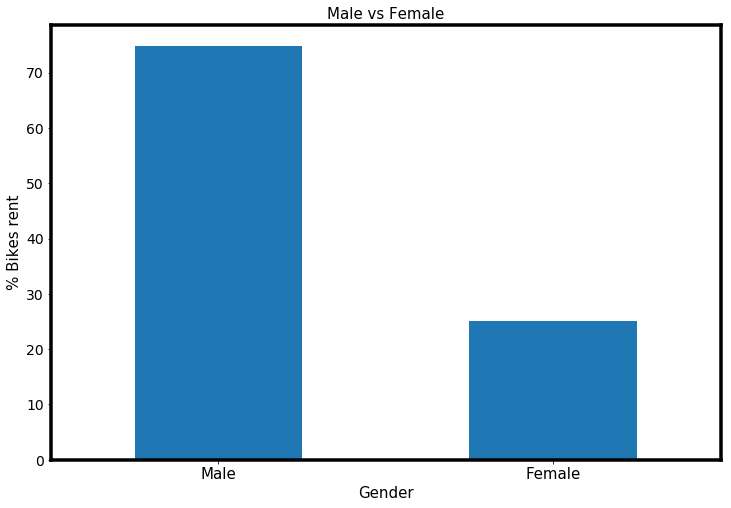

In [135]:
#Plotting the male vs female distribution
plt.figure(figsize=(12,8))
male_VS_female=(newdf['gender'].value_counts()*100)/len(newdf['gender'])
male_VS_female.plot(kind='bar')
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=14)
plt.title("Male vs Female",fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("% Bikes rent",fontsize=15)
#ax.set_yticklabels(['% {}'.format(x) for x in male_VS_female])
matplotlib.rcParams['axes.linewidth'] = 3.5

__The ratio between Male and Female is around 75:25. Which means Divvy has more number of Male customers than Female.__

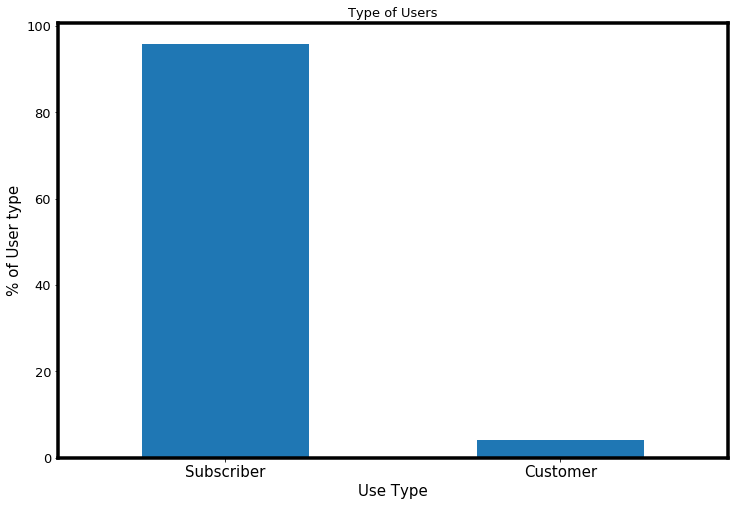

In [183]:
#Plotting the user type distribution
subs_VS_cust=(newdf['usertype'].value_counts()*100)/len(newdf)
subs_VS_cust.plot(kind='bar',figsize=(12,8))
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=13)
plt.title("Type of Users",fontsize=13)
plt.ylabel("% of User type",fontsize=15)
plt.xlabel("Use Type",fontsize=15)
matplotlib.rcParams['axes.linewidth'] = 3.5

__The above plot clearly dipicts that Divvy has around 90% of its user as subscribers and rest of the users are customers. I believe more number of Divvy Bike users are working population who rents the bike on a daily basis. Thats the reason it has more number of subscribers than the customers.Divvy's subcription plan seems to be reasonable for the customers. Divvy should keep focusing on maintaining its subcribers__
 - A subscriber is the one who has an ongoing commitment for a product with you. They will continue to pay you throughout or for  the life of their subscription product. Customers donot commit for the product. They may or many not use the service or the product in the future.

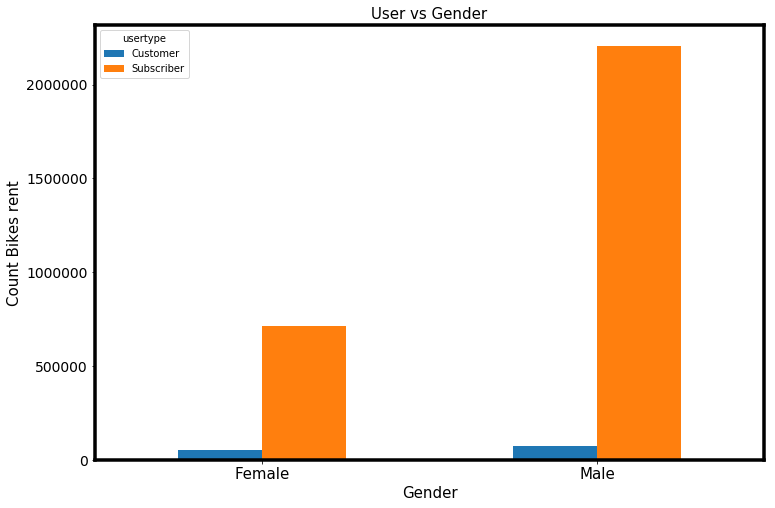

In [137]:
ct=pd.crosstab(newdf.gender,newdf.usertype)
ct.plot(kind='bar',figsize=(12,8))
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=14)
plt.title("User vs Gender",fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Count Bikes rent",fontsize=15)
matplotlib.rcParams['axes.linewidth'] = 3.5

__After futher breaking down the user type into gender we can see that there are more male subscribers than the female subscribers.__

In [138]:
# Statistics parameters of Trip Duaration
newdf['tripduration(secs)'].describe()

count    3.047873e+06
mean     9.524892e+02
std      2.113289e+04
min      6.100000e+01
25%      3.630000e+02
50%      5.900000e+02
75%      9.820000e+02
max      1.355760e+07
Name: tripduration(secs), dtype: float64

The average trip duration in FY 2018 is 952 seconds or 16 mins. This is also a clear indication that Divvy users are mostly working population who rents the bike to cover the distance after getting down from bus or train.

### Let's see the distribution across various time: Week, Month, and Quarter

In [184]:
#Taking the year, month and week day from the start time column.
newdf['startdate_time'] = pd.to_datetime(newdf['start_time'], errors='coerce')
newdf['dayoftheWeek'] = newdf['startdate_time'].dt.weekday_name
newdf['Month'] = newdf['startdate_time'].dt.month_name()
newdf['Year'] = newdf['startdate_time'].dt.year
newdf['StartingTime']=newdf['startdate_time'].dt.time

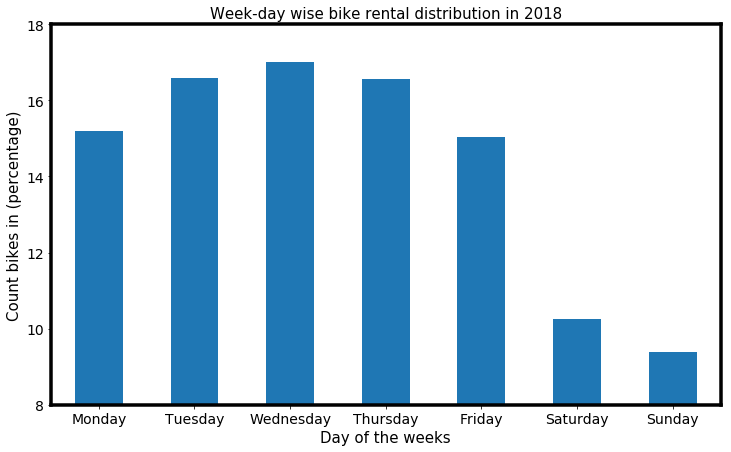

In [162]:
#Plotting the week day wise distribution
newdf['dayoftheWeek'] = pd.Categorical(newdf['dayoftheWeek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

week1=(newdf['dayoftheWeek'].value_counts()*100)/len(newdf)
week2 = week1.sort_index()

from pylab import *
plt.figure(figsize=(12,7))
week2.plot(kind='bar')

plt.ylim(8,max(week2)+1)
plt.xticks(rotation=0,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Week-day wise bike rental distribution in 2018",fontsize=15)
plt.xlabel("Day of the weeks",fontsize=15)
plt.ylabel("Count bikes in (percentage)",fontsize=15)
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 3.5


__The above bar plot is showing the bike distribution acrross the week days. Wednesday being on the highest bar we can say that Wesdnesday is the peak day people renting Divvy Bike. The plot clearly indicates that on Saturday and Sunday less number of users are owing the bike in comparison to the week days.__ 

Text(0, 0.5, 'Count bikes in (percentage)')

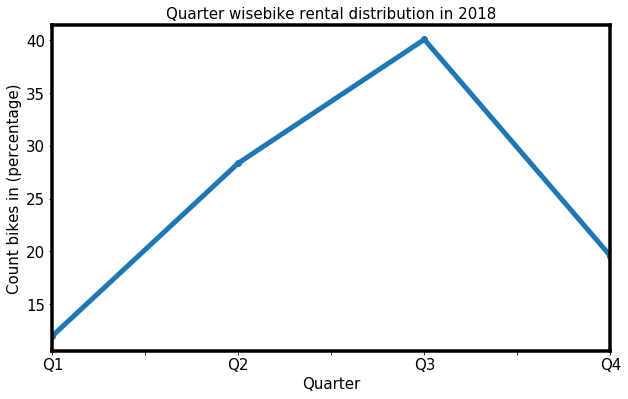

In [165]:
#Plotting the Quarter wise distribution
newdf['Quarter'] = pd.Categorical(newdf['Quarter'], categories=['Q1','Q2','Q3','Q4'],ordered=True)
qt=(newdf['Quarter'].value_counts()*100)/len(newdf)
qt = qt.sort_index()
plt.figure(figsize=(10,6))
qt.plot(kind='line',marker='o',linewidth=5.0,linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Quarter wisebike rental distribution in 2018",fontsize=15)
plt.xlabel("Quarter",fontsize=15)
plt.ylabel("Count bikes in (percentage)",fontsize=15)

__The above line chart is showing the variations in number of bikes owned across the four quarters. The useful insights from this graph is as below:__
    - Q3 has 3 times more users than Q1. The reason behind this may be that winters in Chicago are worse, specially in the month of Jan and Feb. On the opposite side the summers of Chicago (July and August) is very beautiful, that is the reason people prefer to commute to the work in the summer renting a bike.
    
    - In Q2 there is a increase in users are compare to Q1, because Q2 includes the month of May and June, which are pretty warm and nice.
    
    - There is a sharp decrease in the users from Q3 to Q4, beacause the winters in Chicago are the worst.Huh!!
    
 

99.58


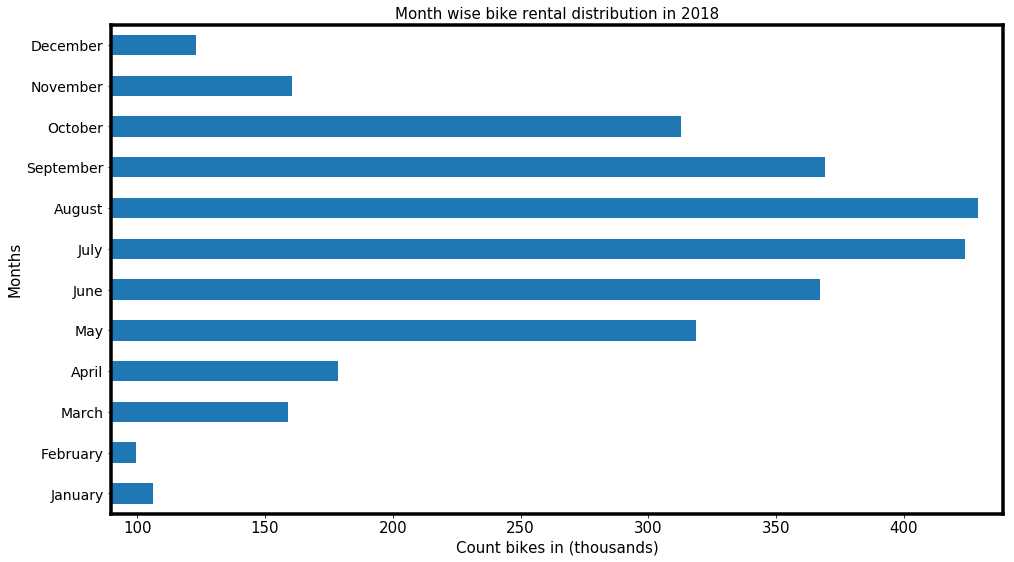

In [142]:
#Plotting the month wose distribution 
newdf['Month'] = pd.Categorical(newdf['Month'], categories= ['January', 'February', 'March', 'April', 'May', 'June', 'July',
'August', 'September', 'October', 'November', 'December'],ordered=True)
month=newdf['Month'].value_counts()/1000
month = month.sort_index()
from pylab import *
plt.figure(figsize=(16,9))
plt.xlim(min(month)-10,max(month)+10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.title("Month wise bike rental distribution in 2018",fontsize=15)
plt.xlabel("Count bikes in (thousands)",fontsize=15)
plt.ylabel("Months",fontsize=15)
month.plot(kind='barh')
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 3.5

__The above bar plot is showing the breakdown in months, which is giving a clear indication of the winters in Chicago. July and August being on the highest bar and december, jan and Feb being on the lowest bar.__

### Let's dive into the age of the users now.

In [143]:
#Creating bins of various ages
bins = [10,15,20, 25,30,40, 50,60,70,80, 100]
s = pd.cut(newdf['age'], bins=bins).value_counts()


C:\Users\16507\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\16507\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


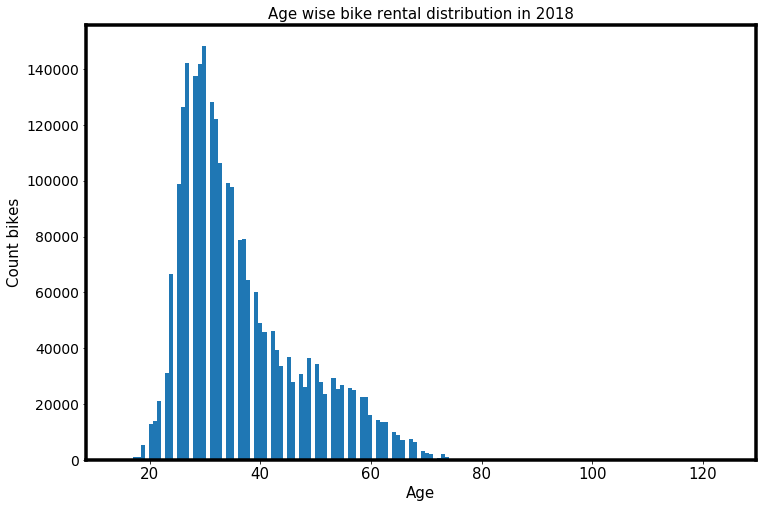

In [144]:
#Plotting the age distribution
plt,figure(figsize=(12,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.title("Age wise bike rental distribution in 2018",fontsize=15)
plt.ylabel("Count bikes",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.hist(newdf['age'],bins=150)
matplotlib.rcParams['axes.linewidth'] = 3.5

__Technical description:__ For creating the above histogram, first we created a new column of Age from the Birth year column. Then we divided the age into 10 bins. Bins = [10,15,20, 25,30,40, 50,60,70,80, 100] From the statistical point of view, the histogram is showing a normal distribution.The histogram is having more data points lying in the bins of 20 to 40. 

__Business Value:__ The above histogram seems very important for the business purpose. As we can see most of the users are lying in the age of 30 to 40, Divvy stakeholders can make various strategy to focus on the customers aged more than 40 years. They should focus on why people above 40 are not renting the Divvy Bikes?? 

### Lets get some insight about the popular routes

In [185]:
#getting the tuple for from and to Route
From_to_Desitnations=pd.Series(newdf.to_station_id.values,index=newdf.from_station_id)
From_to_Desitnations=tuple(zip(From_to_Desitnations,From_to_Desitnations.index))

#most common from and to Route
most_common_destinations= [word for word, word_count in Counter(From_to_Desitnations).most_common(10)]

#Most common starting route with their count
most_comman_from_Id=[word_count for word_count in Counter(newdf.from_station_id).most_common(10)]
most_comman_from_Id2=[]
for i in most_comman_from_Id:
    most_comman_from_Id2.append(i[0])

In [186]:
#Getting only the dataframe which consist of the popular route
dff=newdf[newdf['from_station_id'].isin(most_comman_from_Id2)]

#Getting only the dataframe which consist of the popular starting point in the route
ddf=newdf[newdf['from_station_id'].isin(most_comman_from_Id2)]
#ddf

In [147]:
#most common from station names with their counts
fromStations=[word_count for word_count in Counter(ddf.from_station_name).most_common(10)]
fromStationName=[]
fromStationCount=[]
for i in fromStations:
    fromStationName.append(i[0])
    fromStationCount.append(i[1])

[('Canal St & Adams St', 60202),
 ('Clinton St & Madison St', 49535),
 ('Clinton St & Washington Blvd', 47035),
 ('Kingsbury St & Kinzie St', 32809),
 ('Canal St & Madison St', 32335),
 ('Daley Center Plaza', 31913),
 ('Michigan Ave & Washington St', 31641),
 ('Franklin St & Monroe St', 30850),
 ('Columbus Dr & Randolph St', 30116),
 ('Orleans St & Merchandise Mart Plaza', 27371)]

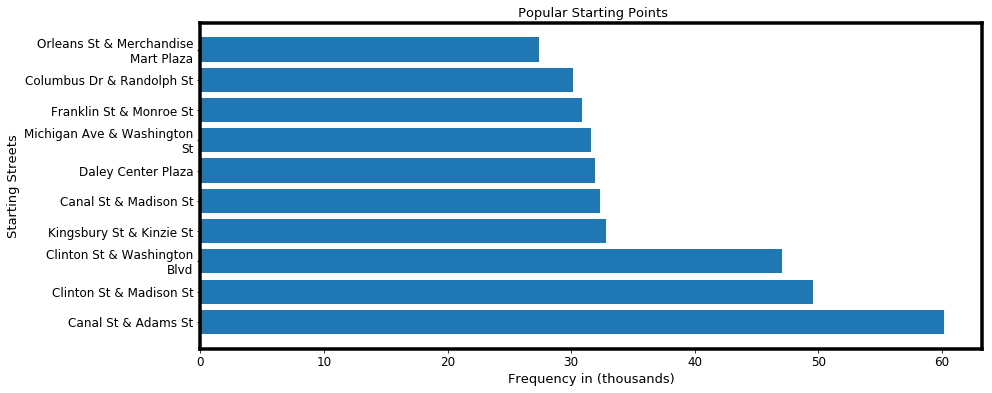

In [149]:
#we can say that these are the common bike pickup points
fromStationName = [ '\n'.join(wrap(l, 25)) for l in fromStationName ]
fig = plt.figure(figsize=(14,6))
plt.barh(fromStationName,[i/1000 for i in fromStationCount])
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Starting Streets',fontsize=13)
plt.xlabel('Frequency in (thousands)',fontsize=13)
plt.title(' Popular Starting Points',fontsize=13)
matplotlib.rcParams['axes.linewidth'] = 3.5

__In the above horizontal bar plot we have plotted 10 most frquent starting points in the data. The above ten starting point, I think would be near to a bus stop or a train station.__

  __Business Insight__: Divvy should make sure that bikes are always available to pick up on these points. 

In [150]:
most_comman_to_Id=[word_count for word_count in Counter(newdf.to_station_id).most_common(10)]
most_comman_to_Id2=[]
for i in most_comman_to_Id:
    most_comman_to_Id2.append(i[0])
df4=newdf[newdf['to_station_id'].isin(most_comman_to_Id2)]

In [153]:
#most common to stations with their counts
ToStations=[word_count for word_count in Counter(df4.to_station_name).most_common(10)]
ToStationName=[]
ToStationCount=[]
for i in ToStations:
    ToStationName.append(i[0])
    ToStationCount.append(i[1])

[('Canal St & Adams St', 57217),
 ('Clinton St & Madison St', 48495),
 ('Clinton St & Washington Blvd', 46272),
 ('Kingsbury St & Kinzie St', 33156),
 ('Daley Center Plaza', 32954),
 ('Michigan Ave & Washington St', 31637),
 ('Canal St & Madison St', 29552),
 ('Franklin St & Monroe St', 26621),
 ('Streeter Dr & Grand Ave', 25025),
 ('LaSalle St & Jackson Blvd', 24740)]

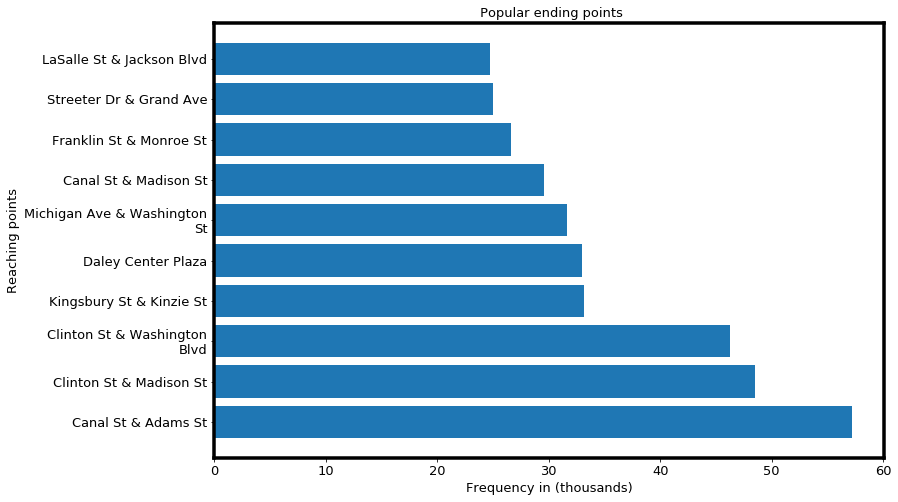

In [155]:
#we can say that these are the ommon bike droping points
ToStationName = [ '\n'.join(wrap(l, 25)) for l in ToStationName ]
fig = plt.figure(figsize=(12,8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.barh(ToStationName,[i/1000 for i in ToStationCount])
plt.ylabel('Reaching points',fontsize=13)
plt.title(' Popular ending points',fontsize=13)
plt.xlabel('Frequency in (thousands)',fontsize=13)
matplotlib.rcParams['axes.linewidth'] = 3.5

__In the above horizontal bar plot we have plotted 10 most frquent ending points in the data. The above ten ending point, I think would be near to some business community or business street__


In [156]:
dff=newdf.loc[(newdf.from_station_id.isin(most_comman_from_Id2)) & (newdf.to_station_id.isin(most_comman_to_Id2))]
#print("There are around {}% people pick and drop bike on these points".format(round(len(dff*100)/len(newdf),2)))
dff['from_to_destinations']=dff['from_station_name'] + ' To ' + dff['to_station_name']
#dff.head()

C:\Users\16507\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<BarContainer object of 10 artists>

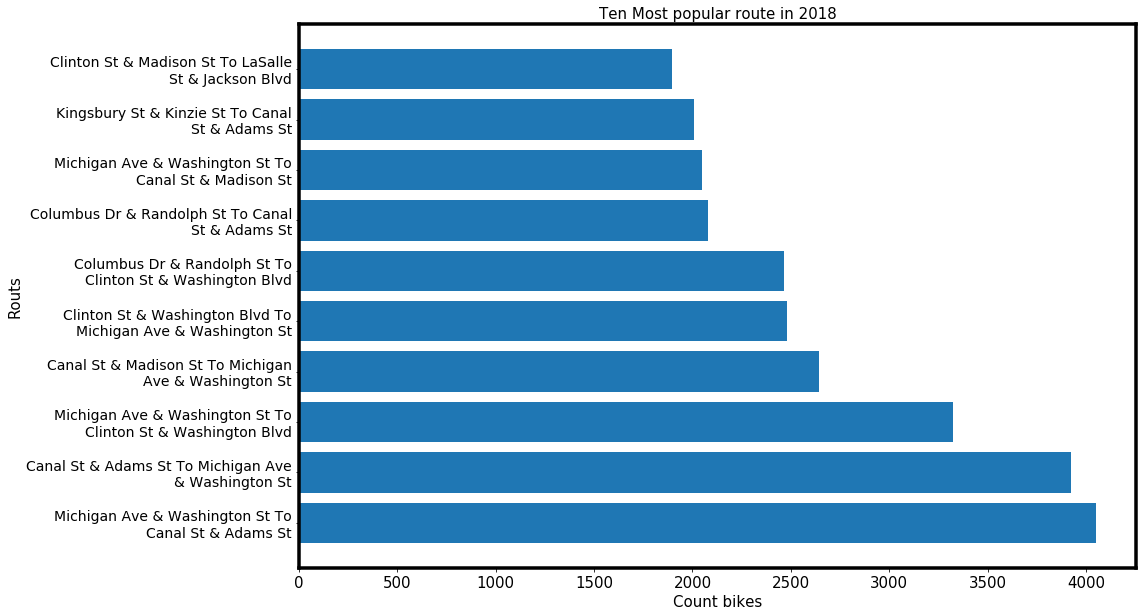

In [157]:
ToStations=[word_count for word_count in Counter(dff.from_to_destinations).most_common(10)]
popular_route=dff['from_to_destinations'].value_counts()

routeName=[]
routeCount=[]
for i in ToStations:
    routeName.append(i[0])
    routeCount.append(i[1])
routeName = [ '\n'.join(wrap(l, 35)) for l in routeName ]
plt.figure(figsize=(15,10))
#plt.xlim(min(popular_route)-10000,max(popular_route)+10000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.title("Ten Most popular route in 2018",fontsize=15)
plt.xlabel("Count bikes",fontsize=15)
plt.ylabel("Routs",fontsize=15)
plt.barh(routeName,routeCount)

__Finally these are the 10 frequent routes in the data. This plot can be very helpful for Divvy stakeholders in taking various marketing decisions:__
  - if Divvy wants to make its offers and promotions more visible to the population, then it should launch those campaigns here first.This will attract more number of customers as these places seems to be a business hub or bus stations. 

## Conclusion and recommendation:

The above study was very helpful for us to understand various business aspect of Divvy Bikes. 
 - The ratio between Male and Female is around 75:25. Which means Divvy has more number of Male customers than Female.Divvy should try to increase its female customer. One of the suggestion can be that Divvy can offer collor ful bikes which Female will more likely to ride.<br>
 <br>
 - Divvy has around 90% of its user as subscribers and rest of the users are customers. I believe more number of Divvy Bike users are working population who rents the bike on a daily basis. Thats the reason it has more number of subscribers than the customers.Divvy's subcription plan seems to be reasonable for the customers. Divvy should keep focusing on maintaining its subcribers.<br>
  <br>
 - Wesdnesday is the peak day people renting Divvy Bike. The plot clearly indicates that on Saturday and Sunday less number of users are owing the bike in comparison to the week days.Divvy should make sure to maintain its bike inventory during weekdays.<br>
 <br>
 - Q3 has 3 times more users than Q1. The reason behind this may be that winters in Chicago are worse, specially in the month of Jan and Feb. On the opposite side the summers of Chicago (July and August) is very beautiful, that is the reason people prefer to commute to the work in the summer renting a bike.<br>
 <br>
 -  Most of the users are lying in the age of 30 to 40, Divvy stakeholders can make various strategy to focus on the customers aged more than 40 years. They should focus on why people above 40 are not renting the Divvy Bikes??
 
 
 